<a href="https://colab.research.google.com/github/SuhailAhmad1/Machine_learning/blob/main/Data_prepocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing basic libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set_theme(style="whitegrid")

# **Feature Extraction**

# 1. DictVectorizer

Converts dictionary data into matrix form

In [ ]:
data = [
        {'age': 4, 'height': 96.0},
        {'age': 1, 'height': 73.9},
        {'age': 3, 'height': 88.9},
        {'age': 2, 'height': 81.6}
]

In [ ]:
from sklearn.feature_extraction import DictVectorizer
dv = DictVectorizer(sparse=False)
data_transformed = dv.fit_transform(data)
data_transformed

array([[ 4. , 96. ],
       [ 1. , 73.9],
       [ 3. , 88.9],
       [ 2. , 81.6]])

In [ ]:
data_transformed.shape

(4, 2)

# 2. Data Imputation

* Identifies the missing values and replaces them with appropraite value.
Values can be **mean**, **median** or **mode**
We can use specified constant value also

In [ ]:
from sklearn.impute import SimpleImputer

* Missing values can be int, float, atr, np.nan, or None. Default is np.nan
* Default strategy is mean




In [ ]:
cols = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num']

heart_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", header=None, names=cols)

In [ ]:
heart_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [ ]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [ ]:
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64

* There are two non-numeric columns. Lets print their unique values

In [ ]:
print("Unique Values in ca : ", heart_data.ca.unique())
print("Unique Values in thal : ", heart_data.thal.unique())

Unique Values in ca :  ['0.0' '3.0' '2.0' '1.0' '?']
Unique Values in thal :  ['6.0' '3.0' '7.0' '?']


* Since both these contains **?** which is a missing a value. So lets find out the number of missing values in both them. 

In [ ]:
print("# Missing values in ca : ",
      heart_data.loc[heart_data.ca == "?", 'ca'].count())
print("# Missing values in thal : ",
      heart_data.loc[heart_data.thal == '?', "thal"].count())

# Missing values in ca :  4
# Missing values in thal :  2


* Now replace the **?** with np.nan

In [ ]:
heart_data.replace('?', np.nan, inplace = True)

In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
heart_data_imputed = imputer.fit_transform(heart_data)
print(heart_data_imputed.shape)

(303, 14)


**add_indicator = True** adds additional column for each column contains missing values

In [ ]:
imputer = SimpleImputer(missing_values = np.nan, strategy = 'mean', add_indicator=True)
heart_data_imputed_with_indicator = imputer.fit_transform(heart_data)
print(heart_data_imputed_with_indicator.shape)

(303, 16)


# 3. Feature Scaling

* Transforms feature values such that all the features are on the same scale
Can be performed using the below three methods:

1.   Standardization
2.   Normalization
3.   MaxAbsScaler



In [ ]:
cols = ['Sex', 'Length', 'Diameter', 'Height', 'Whole Weight', 'Shucked Weight', 'Viscere Weight', 'Shell Weight', 'Rings']
abalone_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data", header=None, names=cols)

In [ ]:
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole Weight    4177 non-null   float64
 5   Shucked Weight  4177 non-null   float64
 6   Viscere Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [ ]:
print(abalone_data.Sex.unique())

['M' 'F' 'I']


In [ ]:
abalone_data = abalone_data.replace({"Sex": {"M":1, "F":2, "I":3}})
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole Weight    4177 non-null   float64
 5   Shucked Weight  4177 non-null   float64
 6   Viscere Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 293.8 KB


* Separate features from labels

In [ ]:
y = abalone_data.pop("Rings")
abalone_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int64  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole Weight    4177 non-null   float64
 5   Shucked Weight  4177 non-null   float64
 6   Viscere Weight  4177 non-null   float64
 7   Shell Weight    4177 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 261.2 KB


* Examine the dataset

In [ ]:
abalone_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Sex,4177.0,1.955470,0.827815,1.0000,1.0000,2.0000,3.000,3.0000
Length,4177.0,0.523992,0.120093,0.0750,0.4500,0.5450,0.615,0.8150
Diameter,4177.0,0.407881,0.099240,0.0550,0.3500,0.4250,0.480,0.6500
Height,4177.0,0.139516,0.041827,0.0000,0.1150,0.1400,0.165,1.1300
Whole Weight,4177.0,0.828742,0.490389,0.0020,0.4415,0.7995,1.153,2.8255
Shucked Weight,4177.0,0.359367,0.221963,0.0010,0.1860,0.3360,0.502,1.4880
Viscere Weight,4177.0,0.180594,0.109614,0.0005,0.0935,0.1710,0.253,0.7600
Shell Weight,4177.0,0.238831,0.139203,0.0015,0.1300,0.2340,0.329,1.0050


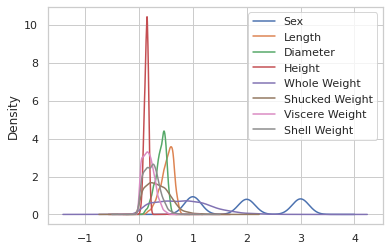

In [ ]:
ax = abalone_data.plot.kde()

* We can clearly see that featues are indeed on different scales

* MinMaxScaler

In [ ]:
from sklearn.preprocessing import MinMaxScaler
X = abalone_data
mms = MinMaxScaler()
X_normalized = mms.fit_transform(X)
X_normalized[:5]

array([[0.        , 0.51351351, 0.5210084 , 0.0840708 , 0.18133522,
        0.15030262, 0.1323239 , 0.14798206],
       [0.        , 0.37162162, 0.35294118, 0.07964602, 0.07915707,
        0.06624075, 0.06319947, 0.06826109],
       [0.5       , 0.61486486, 0.61344538, 0.11946903, 0.23906499,
        0.17182246, 0.18564845, 0.2077728 ],
       [0.        , 0.49324324, 0.5210084 , 0.11061947, 0.18204356,
        0.14425017, 0.14944042, 0.15296462],
       [1.        , 0.34459459, 0.33613445, 0.07079646, 0.07189658,
        0.0595158 , 0.05134957, 0.0533134 ]])

* StandardScaler

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_Standardized = ss.fit_transform(X)
X_Standardized[:5]

array([[-1.15434629, -0.57455813, -0.43214879, -1.06442415, -0.64189823,
        -0.60768536, -0.72621157, -0.63821689],
       [-1.15434629, -1.44898585, -1.439929  , -1.18397831, -1.23027711,
        -1.17090984, -1.20522124, -1.21298732],
       [ 0.05379815,  0.05003309,  0.12213032, -0.10799087, -0.30946926,
        -0.4634999 , -0.35668983, -0.20713907],
       [-1.15434629, -0.69947638, -0.43214879, -0.34709919, -0.63781934,
        -0.64823753, -0.60759966, -0.60229374],
       [ 1.26194258, -1.61554351, -1.54070702, -1.42308663, -1.27208566,
        -1.2159678 , -1.28733718, -1.32075677]])

In [ ]:
X_Standardized.mean(axis = 0)

array([-1.19075871e-17, -5.83471770e-16, -3.02792930e-16,  3.91249292e-16,
        9.18585294e-17, -1.02065033e-17,  2.70472337e-16,  2.97689679e-16])

In [ ]:
X_Standardized.std(axis = 0)

array([1., 1., 1., 1., 1., 1., 1., 1.])

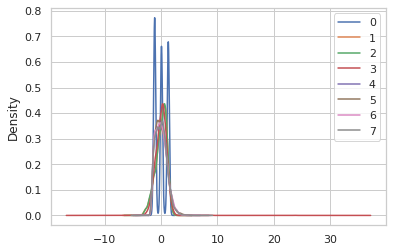

In [ ]:
ax = pd.DataFrame(X_Standardized).plot.kde()

# 4. add_dummy_feature

* Adds a column of 1's

In [ ]:
x = np.array(
    [[7,1],
     [1,8],
     [2,0],
     [9,6]]
)
from sklearn.preprocessing import add_dummy_feature
x_new = add_dummy_feature(x)
print(x_new)

[[1. 7. 1.]
 [1. 1. 8.]
 [1. 2. 0.]
 [1. 9. 6.]]


# 5. Custom tranformers

* Constructs transformed features by applying a user defined function

In [ ]:
wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ";")
wine_data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


In [ ]:
from sklearn.preprocessing import FunctionTransformer
transformer = FunctionTransformer(np.log1p, validate=True)
wine_data_transformed = transformer.transform(np.array(wine_data))
pd.DataFrame(wine_data_transformed, columns = wine_data.columns).describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,2.215842,0.178100,1.722767,2.091864,2.186051,2.322388,2.827314
volatile acidity,1599.0,0.417173,0.114926,0.113329,0.329304,0.418710,0.494696,0.947789
citric acid,1599.0,0.228147,0.152423,0.000000,0.086178,0.231112,0.350657,0.693147
residual sugar,1599.0,1.218131,0.269969,0.641854,1.064711,1.163151,1.280934,2.803360
chlorides,1599.0,0.083038,0.038991,0.011929,0.067659,0.076035,0.086178,0.476855
free sulfur dioxide,1599.0,2.639013,0.623790,0.693147,2.079442,2.708050,3.091042,4.290459
total sulfur dioxide,1599.0,3.634750,0.682575,1.945910,3.135494,3.663562,4.143135,5.669881
density,1599.0,0.691519,0.000945,0.688170,0.690945,0.691521,0.692064,0.694990
pH,1599.0,1.460557,0.035760,1.319086,1.437463,1.460938,1.481605,1.611436
sulphates,1599.0,0.501073,0.093731,0.285179,0.438255,0.482426,0.548121,1.098612


# 6. Ploynomial Features

* Generates a new feature matrix consisting of all polynomial combinations of the features with the degree less or equal to specified degree 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

wine_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep = ";")
wine_data_copy = wine_data.copy()
wine_data = wine_data_copy.drop(['quality'], axis = 1)
print("Number of features before transformation : ",wine_data.shape)

poly = PolynomialFeatures(degree = 2)
poly_wine_data = poly.fit_transform(wine_data)
print("Number of features after transformation : ", poly_wine_data.shape)

Number of features before transformation :  (1599, 11)
Number of features after transformation :  (1599, 78)


In [ ]:
poly.get_feature_names_out()

array(['1', 'fixed acidity', 'volatile acidity', 'citric acid',
       'residual sugar', 'chlorides', 'free sulfur dioxide',
       'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol',
       'fixed acidity^2', 'fixed acidity volatile acidity',
       'fixed acidity citric acid', 'fixed acidity residual sugar',
       'fixed acidity chlorides', 'fixed acidity free sulfur dioxide',
       'fixed acidity total sulfur dioxide', 'fixed acidity density',
       'fixed acidity pH', 'fixed acidity sulphates',
       'fixed acidity alcohol', 'volatile acidity^2',
       'volatile acidity citric acid', 'volatile acidity residual sugar',
       'volatile acidity chlorides',
       'volatile acidity free sulfur dioxide',
       'volatile acidity total sulfur dioxide',
       'volatile acidity density', 'volatile acidity pH',
       'volatile acidity sulphates', 'volatile acidity alcohol',
       'citric acid^2', 'citric acid residual sugar',
       'citric acid chlorides', 'citric aci

# 7. Discretization

* Also known as **quantization** and **binning**. 
* Divides a continuous variable into bins

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer

In [ ]:
wine_data = wine_data_copy.copy()
enc = KBinsDiscretizer(n_bins = 10, encode="onehot")
X = np.array(wine_data['chlorides']).reshape(-1,1)
X_binned = enc.fit_transform(X)

In [ ]:
X_binned

<1599x10 sparse matrix of type '<class 'numpy.float64'>'
	with 1599 stored elements in Compressed Sparse Row format>

In [ ]:
X_binned.toarray()[:5]

array([[0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]])

# 8. Handling Categorical Features

* To convert categorical data into numeric features . Following methods can be used: 


1.   Ordinal Encoding
2.   One-hot Encoding
3.   Label Encode
4.   Using dummy variables



**Orinal encoding** and **One-hot encoding**

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

In [ ]:
cols = ['sepal length', 'sepal width', 'petal width', 'label']
iris_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data", header = None, names = cols)
iris_data.head()

,sepal length,sepal width,petal width,label
5.1,3.5,1.4,0.2,Iris-setosa
4.9,3.0,1.4,0.2,Iris-setosa
4.7,3.2,1.3,0.2,Iris-setosa
4.6,3.1,1.5,0.2,Iris-setosa
5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris_data.label.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [ ]:
onehotenc = OneHotEncoder(categories="auto")
iris_labels = onehotenc.fit_transform(iris_data.label.values.reshape(-1,1))
iris_labels.toarray()[:5]

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [ ]:
ordinal = OrdinalEncoder()
iris_label = np.array(iris_data['label'])
print(iris_label[:5])
iris_label_t = ordinal.fit_transform(iris_label.reshape(-1,1))
iris_label_t[:5]

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.]])

# 10. Feature Selection

* Helps to select features/reduce dimensions, either to improve estimator's accuracy scores or to boost their accuracy

* **Filter based methods**

1. Varience Threshold

In [ ]:
data = [
        {'age': 4, 'height': 96.0},
        {'age':1, 'height': 73.9},
        {'age':3, 'height': 88.9},
        {'age':2, 'height': 81.6}]
      
dv = DictVectorizer(sparse = False)
data_trans = dv.fit_transform(data)
np.var(data_trans, axis = 0)

array([ 1.25 , 67.735])

In [ ]:
from sklearn.feature_selection import VarianceThreshold

vt = VarianceThreshold(threshold = 9)
data_new = vt.fit_transform(data_trans)
data_new

array([[96. ],
       [73.9],
       [88.9],
       [81.6]])

In [ ]:
data_new.shape

(4, 1)

2. SelectKBest

In [ ]:
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import train_test_split

X_california, Y_california = fetch_california_housing(return_X_y = True)

X, y = X_california[:2000, : ], Y_california[:2000]
print("Shape of feature matrix before feature selection : ",X.shape)

Shape of feature matrix before feature selection :  (2000, 8)


In [ ]:
skb = SelectKBest(mutual_info_regression, k = 3)
X_new = skb.fit_transform(X, y)
print("Shape of feature matrix after SelectKBest feature selection : ", X_new.shape)

Shape of feature matrix after SelectKBest feature selection :  (2000, 3)


In [ ]:
skb.get_feature_names_out()

array(['x0', 'x6', 'x7'], dtype=object)

3. SelectPercentile

In [ ]:
from sklearn.feature_selection import SelectPercentile

sp = SelectPercentile(mutual_info_regression, percentile = 50)
X_new_sp = sp.fit_transform(X,y)
print("Shape of feature matrix after SelectPercentile feature selection : ", X_new_sp.shape)

Shape of feature matrix after SelectPercentile feature selection :  (2000, 4)


In [ ]:
sp.get_feature_names_out()

array(['x0', 'x2', 'x6', 'x7'], dtype=object)

4. GenericUnivariateSelect

In [ ]:
#to achieve SelectKBest

from sklearn.feature_selection import GenericUnivariateSelect

gus = GenericUnivariateSelect(mutual_info_regression, mode = "k_best", param = 3)
X_gus = gus.fit_transform(X,y)
print("Shape of feature matrix after GenericUnivariateSelect feature selection : ", X_gus.shape)

Shape of feature matrix after GenericUnivariateSelect feature selection :  (2000, 3)


* **Wrapper Based methods**

1. RFE (Recursive Fetaure Elimination)


*   Fits a model
*   Ranks the features, afterwards it removes one or more features (Depending upon step parameter)



In [ ]:
from sklearn.datasets import make_friedman1
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=3, step=1)
selector = selector.fit(X,y)

print(selector.support_)

print("Rank of each feature : ",selector.ranking_)

[ True False False False False False  True  True]
Rank of each feature :  [1 5 4 3 6 2 1 1]


In [ ]:
X_transs = selector.transform(X)
X_transs.shape

(2000, 3)

2. SelectFromModel

In [ ]:
from sklearn.feature_selection import SelectFromModel

estimator = LinearRegression()
estimator.fit(X,y)

print(f'Coefficients of features : {estimator.coef_}')

model = SelectFromModel(estimator, max_features=3, prefit=True)
X_ne = model.transform(X)
X_ne.shape

Coefficients of features : [ 3.64048292e-01  5.56221906e-03  5.13591243e-02 -1.64474348e-01
  5.90411479e-05 -1.64573915e-01 -2.17724525e-01 -1.85343265e-01]


(2000, 3)

3. SequentialFeatureSelection

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

In [ ]:
%%time
estimator = LinearRegression()

sfs = SequentialFeatureSelector(estimator, n_features_to_select=3)
sfs.fit_transform(X,y)
print(sfs.get_support())

[ True False False False False  True  True False]
CPU times: user 230 ms, sys: 185 µs, total: 230 ms
Wall time: 256 ms


In [ ]:
%%time
estimator = LinearRegression()

sfs = SequentialFeatureSelector(estimator, n_features_to_select=3, direction="backward")
sfs.fit_transform(X,y)
print(sfs.get_support())

[ True False False False False  True  True False]
CPU times: user 371 ms, sys: 120 ms, total: 491 ms
Wall time: 510 ms


# 12. Chaining transformers

1. Pipeline

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

estimator = [
             ('simpleimputer', SimpleImputer()),
             ('standardscalar', StandardScaler())
]

pipe = Pipeline(steps = estimator)

In [ ]:
pipe

Pipeline(steps=[('simpleimputer', SimpleImputer()),
                ('standardscaler', StandardScaler())])

In [ ]:
#same thing above but using make_pipeline
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(SimpleImputer(),
                     StandardScaler())

In [ ]:
#Accessing individual steps

pipe[1]

StandardScaler()

In [ ]:
pipe['simpleimputer']

SimpleImputer()

In [ ]:
pipe.steps[1]

('standardscaler', StandardScaler())